### Loading the dataset

In [2]:
import pandas as pd

In [3]:
hr_df = pd.read_csv('./data/HR_comma_sep.csv')

In [4]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Understanding influence of satisfaction level

In [7]:
import matplotlib.pyplot as plt
import seaborn as sn

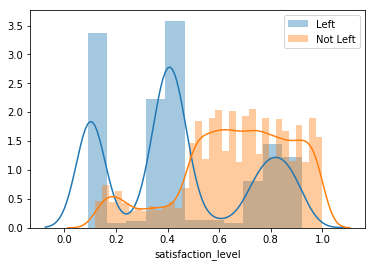

In [9]:
sn.distplot(hr_df[hr_df.left == 1]['satisfaction_level'], label = "Left")
sn.distplot(hr_df[hr_df.left == 0]['satisfaction_level'], label = "Not Left")
plt.legend();

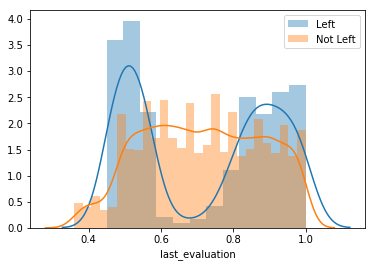

In [10]:
sn.distplot(hr_df[hr_df.left == 1]['last_evaluation'], label = "Left")
sn.distplot(hr_df[hr_df.left == 0]['last_evaluation'], label = "Not Left")
plt.legend();

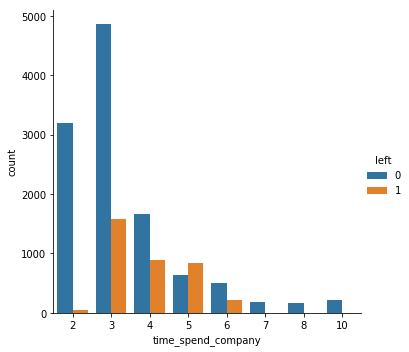

In [12]:
sn.catplot( data = hr_df,
            x = 'time_spend_company',
            hue = 'left',
            kind = 'count');

In [13]:
hr_df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### Encoding categorical features

In [14]:
hr_encoded_df = pd.get_dummies( hr_df,
                                columns = ['sales', 'salary'])

In [15]:
hr_encoded_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [16]:
hr_encoded_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [18]:
hr_encoded_df.shape

(14999, 21)

In [19]:
X_features = list(hr_encoded_df.columns)

In [20]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales_IT',
 'sales_RandD',
 'sales_accounting',
 'sales_hr',
 'sales_management',
 'sales_marketing',
 'sales_product_mng',
 'sales_sales',
 'sales_support',
 'sales_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [21]:
X_features.remove('left')

### Split dataset into train and test sets

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, \
y_train, y_test = train_test_split( hr_encoded_df[X_features],
                                    hr_encoded_df.left,
                                    train_size = 0.8,
                                    random_state = 100)

In [26]:
X_train.shape

(11999, 20)

In [27]:
X_test.shape

(3000, 20)

### Building a classification model: Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg_v1 = LogisticRegression()

In [31]:
logreg_v1.fit(X_train, y_train)

/Users/manaranjan/anaconda/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predict on test set

In [32]:
y_pred_v1 = logreg_v1.predict(X_test)

In [33]:
y_df = pd.DataFrame( {'actual': y_test,
                      'predicted': y_pred_v1} )

In [34]:
y_df.sample(10)

,actual,predicted
13740,0,0
3541,0,0
4326,0,0
9179,0,0
1906,1,1
10370,0,0
1463,1,0
12306,1,0
11502,0,0
7202,0,0


In [35]:
from sklearn.metrics import confusion_matrix

In [39]:
cm_v1 = confusion_matrix(y_df.actual, y_df.predicted, [1,0])

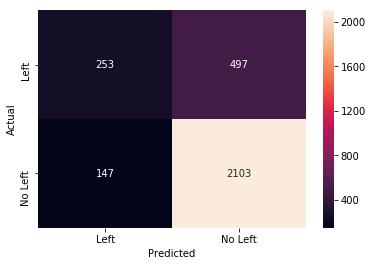

In [45]:
sn.heatmap( cm_v1,
            annot = True,
            fmt = '0.0f',
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left']);
plt.xlabel('Predicted')
plt.ylabel('Actual');

### Obtain the predicted probability values

In [46]:
y_pred_prob_v1 = logreg_v1.predict_proba(X_test)

In [48]:
y_pred_prob_v1[0:10]

array([[0.91244584, 0.08755416],
       [0.90334227, 0.09665773],
       [0.52363702, 0.47636298],
       [0.78259907, 0.21740093],
       [0.1866836 , 0.8133164 ],
       [0.98911839, 0.01088161],
       [0.9711591 , 0.0288409 ],
       [0.36426088, 0.63573912],
       [0.98148221, 0.01851779],
       [0.9574041 , 0.0425959 ]])

In [51]:
y_pred_prob_v1[:,1]

array([0.08755416, 0.09665773, 0.47636298, ..., 0.09919308, 0.03355256,
       0.0252691 ])

In [52]:
y_df['prob'] = y_pred_prob_v1[:,1]

In [53]:
y_df.sample(10)

,actual,predicted,prob
4530,0,0,0.349060
6357,0,0,0.325608
1906,1,1,0.510206
6041,0,0,0.005883
3040,0,0,0.224581
643,1,1,0.577152
8578,0,0,0.112700
4521,0,0,0.436335
1901,1,0,0.276104
7453,0,0,0.054704


In [57]:
y_df['new_preds'] = y_df.prob.map( lambda x: 1 if x >= 0.4 else 0)

In [58]:
cm_v2 = confusion_matrix(y_df.actual, y_df.new_preds, [1,0])

In [63]:
cm_v2[1][0]

228

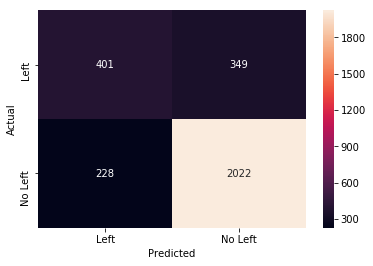

In [59]:
sn.heatmap( cm_v2,
            annot = True,
            fmt = '0.0f',
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left']);
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [60]:
FN_cost = 3.0
FP_cost = 1.0

In [66]:
def get_cost( cutoff ):
    y_df['new_preds'] = y_df.prob.map( lambda x: 1 if x >= cutoff else 0)
    cm_v2 = confusion_matrix(y_df.actual, y_df.new_preds, [1,0])
    
    return FN_cost * cm_v2[0][1] + FP_cost * cm_v2[1][0]

In [67]:
get_cost(0.4)

1275.0

In [69]:
import numpy as np

In [70]:
cutoff_list = np.arange(0.1, 0.6, 0.01)

In [71]:
cutoff_list

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59])

In [72]:
cost_list = [get_cost(x) for x in cutoff_list]

In [73]:
cost_df = pd.DataFrame( { 'cutoff': cutoff_list,
                          'cost': cost_list } )

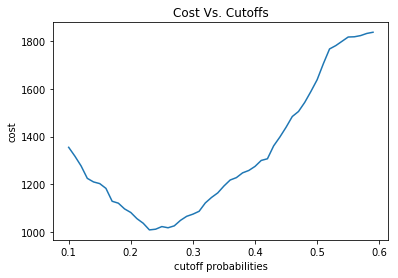

In [77]:
plt.plot(cost_df.cutoff, cost_df.cost );
plt.xlabel('cutoff probabilities')
plt.ylabel('cost')
plt.title('Cost Vs. Cutoffs');

In [78]:
cost_df.sort_values('cost', ascending = True )[0:5]

,cutoff,cost
13,0.23,1009.0
14,0.24,1012.0
16,0.26,1018.0
15,0.25,1023.0
17,0.27,1026.0


### Making Final predictions using optimal cutoff

In [79]:
y_df['final_preds'] = y_df.prob.map( lambda x: 1 if x >= 0.23 else 0)

In [80]:
cm_v3 = confusion_matrix(y_df.actual, y_df.final_preds, [1,0])

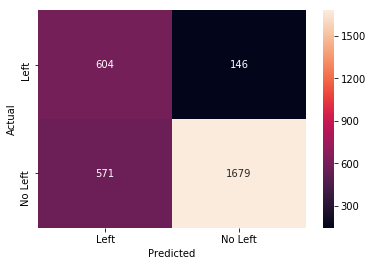

In [81]:
sn.heatmap( cm_v3,
            annot = True,
            fmt = '0.0f',
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left']);
plt.xlabel('Predicted')
plt.ylabel('Actual');

### Measuring Model Accuracy 

In [82]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_df.actual, y_df.final_preds))

              precision    recall  f1-score   support

           0       0.92      0.75      0.82      2250
           1       0.51      0.81      0.63       750

   micro avg       0.76      0.76      0.76      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.82      0.76      0.77      3000



### Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
tree_v1 = DecisionTreeClassifier(max_depth = 5)

In [89]:
tree_v1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
from sklearn.tree import export_graphviz

In [92]:
export_graphviz( tree_v1,
                 out_file = 'tree.dot',
                 feature_names = X_features,
                 class_names = ['No Left', 'Left'],
                 filled = True)

In [93]:
import pydotplus as pdot

In [95]:
tree_graph = pdot.graph_from_dot_file('tree.dot')

In [96]:
tree_graph.write_jpg('tree.jpg')

True

In [97]:
from IPython.display import Image

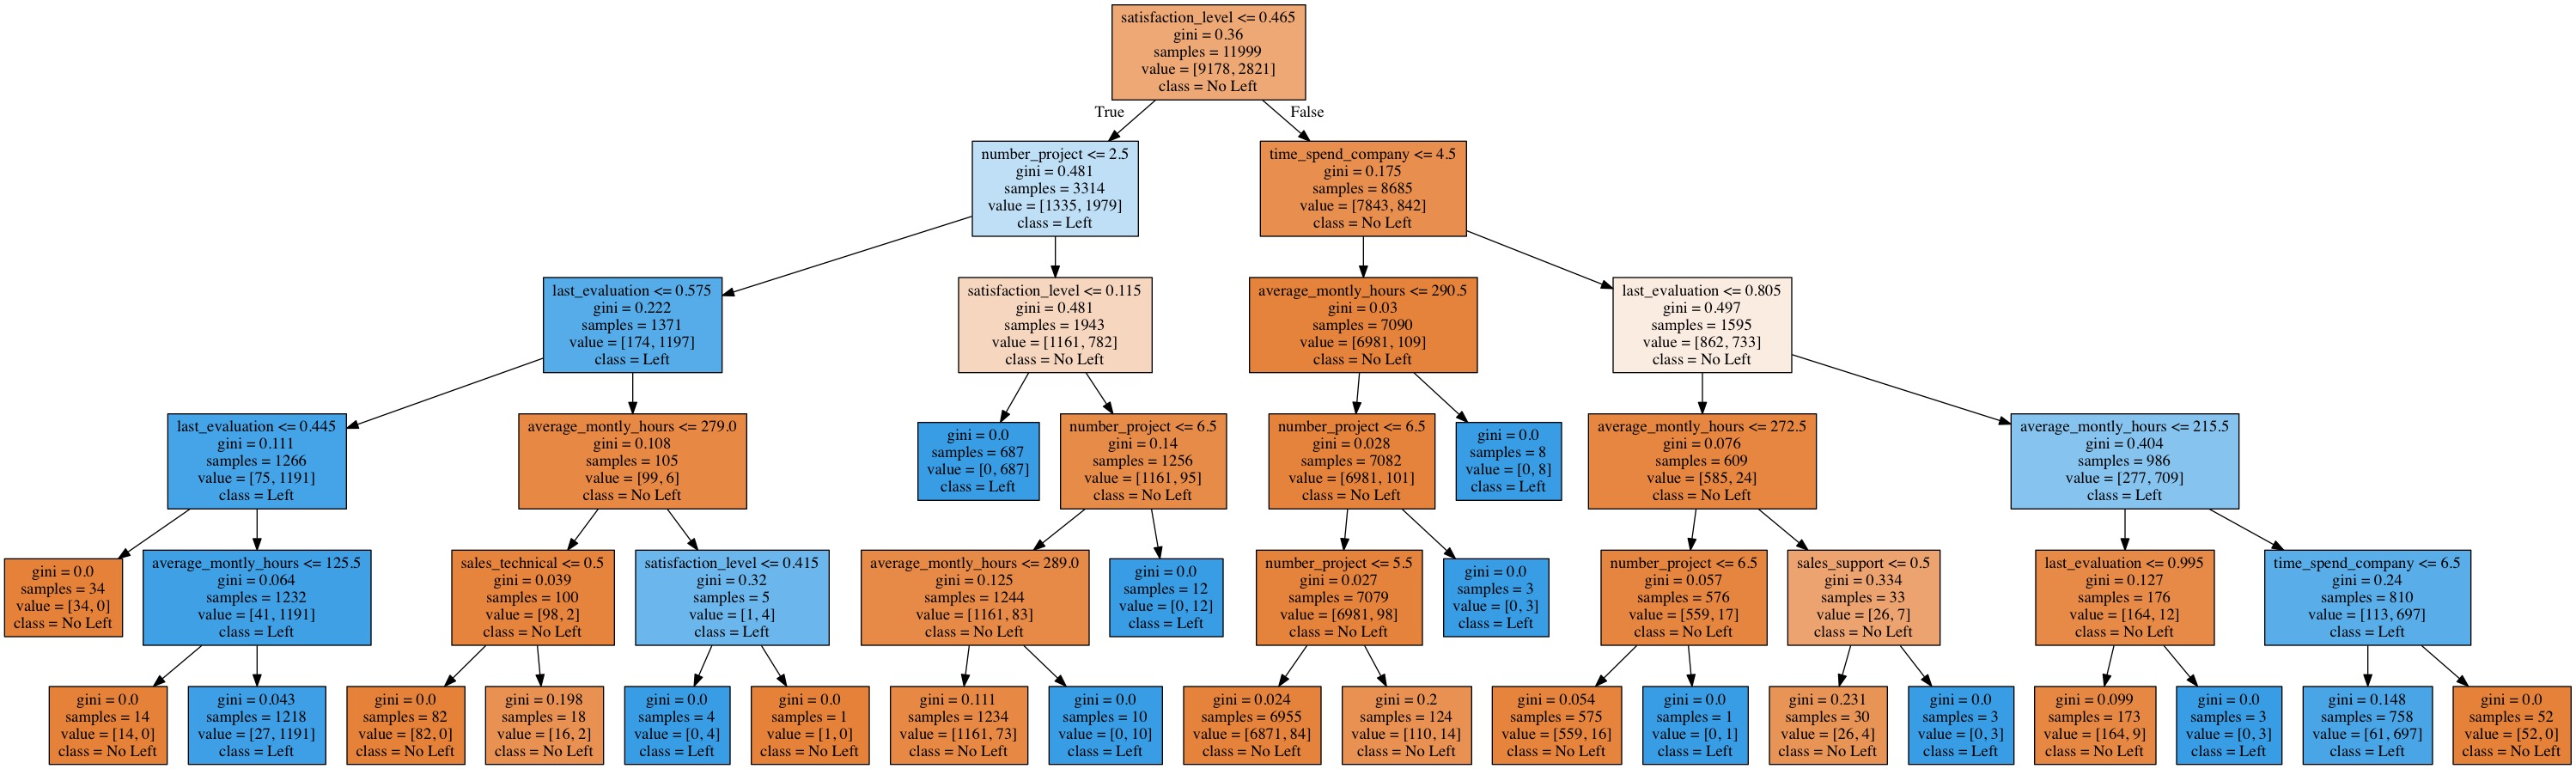

In [98]:
Image('./tree.jpg')

### Predict on test set

In [99]:
tree_pred_v1 = tree_v1.predict(X_test)

In [100]:
tree_cm_v1 = confusion_matrix(y_test, tree_pred_v1, [1,0])

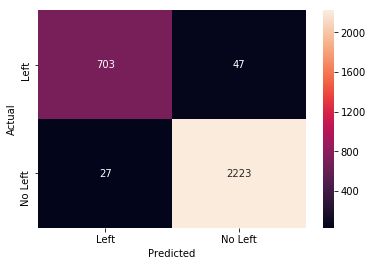

In [101]:
sn.heatmap( tree_cm_v1,
            annot = True,
            fmt = '0.0f',
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left']);
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [102]:
print(classification_report(y_test, tree_pred_v1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2250
           1       0.96      0.94      0.95       750

   micro avg       0.98      0.98      0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000

